# Customer Churn Prediction

Customer churn is a strong concern for any company. This becomes even more stark in highly competetive industries like telecom where the customer acquisition costs can be pretty high.

And hence it becomes very important for companies to be able to predict beforehand the customers who might churn and thereafter preventing it by employing different customer retention strategies.

For companies with a large customer base, they would have enough data to build a good predictor for this. But a challenge here would be that this data would be inherently imbalanced as only a small fraction of the customers would churn usually.

Here we are trying to build a model for classifying telecom customers who would churn.

First let's import some relevant packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now let's import the dataset as a pandas dataframe from the file stored on local storage.

In [2]:
df = pd.read_csv('Customer-Churn-Data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br/>
Checking the shape of the dataframe.

In [4]:
print("The dataframe has", df.shape[0], "rows and", df.shape[1], 'colums')

The dataframe has 7043 rows and 21 colums


## 2. Data Cleaning

Let's see the data types of the columns and also check for missing data.

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<br/>
We see that most of the columns have the proper format with the categorical features stored as objects (except 'SeniorCitizen' which is a binary variable already stored as 'int') and continuous variables as int or float.

Total Charges is an exception. So it needs to be converted to a float variable. Before that let's check whether there are any missing values in the columns.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<br/>
There are no NaN values. Let's go ahead and convert the 'TotalCharges' feature to a float type feature. But since pandas has stored it as an object, let's check if there are any strings stored in some rows.

In [7]:
count = 0
for i in range(df.shape[0]):
    flag = False
    try:
        float(df['TotalCharges'][i])
    except ValueError:
        flag = True
    if flag == True:
        count += 1
        print('Row:', i, "Value:", df['TotalCharges'][i], "\n")
print("Number of values that are not of the type float:", count)

Row: 488 Value:   

Row: 753 Value:   

Row: 936 Value:   

Row: 1082 Value:   

Row: 1340 Value:   

Row: 3331 Value:   

Row: 3826 Value:   

Row: 4380 Value:   

Row: 5218 Value:   

Row: 6670 Value:   

Row: 6754 Value:   

Number of values that are not of the type float: 11


<br>
There are 11 values that are are empty strings (' '). These need to be considered as a missing value. Since these are the only entires that have missing values across the features in our dataset, and the number (11) is small compared to the total number of rows, let's drop these rows from the dataset.
<br><br/>
Then let's also convert the feature to float datatype.

In [8]:
#replacing the missing values with NaN
df.replace({'TotalCharges': {" ":np.nan}}, inplace = True) 

#dropping the rows with NaN values
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

#converting to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

df.shape

(7032, 21)

So now we have a cleaned dataset. Now let's explore the data and from the insights acquired, we will do whatever data manipulation that seems appropriate.

Before going ahead, let's turn our target variable 'Churn' to a binary numeric variable. 


In [9]:
df.drop(columns = 'customerID', inplace = True)

In [10]:
df.replace({'Churn':{'Yes':1, 'No':0}}, inplace = True)

We will also remove the customerID feature which is not a contributing factor in our analysis.

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 3. Exploratory Data Analysis 

First let's see the number of unique values in each feature.

In [12]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

We have three features that are not categorical (Tenure, Monthly Charges and Total Charges). 

**Points to Note**
* We have 16 categorical features
* 6 among them are binary, 9 have 3 categories and 1 has 4

Before we start analysing the features, let's see how our target variable is disributed.

The percentage of Churned customers in the dataset is 26.578498293515356


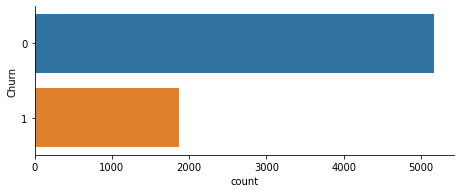

In [13]:
sns.catplot(y="Churn", kind="count",  data=df, height=2.6, aspect=2.5, orient='h')
print('The percentage of Churned customers in the dataset is', df['Churn'].mean()*100)

So we have an imbalanced dataset here. We will take care of this during modelling.

### 3.1 Analysing Tenure, and Monthly and Total Charges

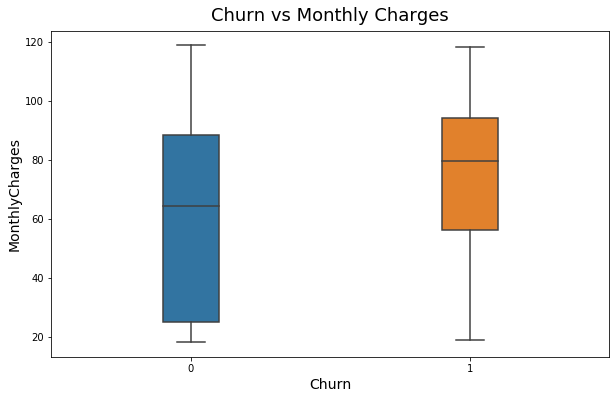

In [14]:
plt.figure(figsize = (10,6))
plt.title('Churn vs Monthly Charges', fontsize = 18, pad=10)
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data=df, width = 0.2)

<br>

**Monthly Charges**
* Customers who have pay a higher monthly charge are showing a higher churn.
* 75% of customers who have churned pay a monthly charge of more than **60**

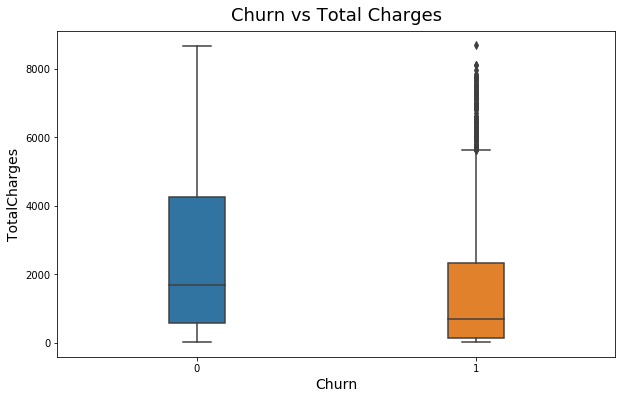

In [15]:
plt.figure(figsize = (10,6))
plt.title('Churn vs Total Charges', fontsize = 18, pad=10)
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
sns.boxplot(x = 'Churn', y = 'TotalCharges', data=df, width = 0.2)

<br>

**Total Charges**
* The total charges for churned customers are lower than that of retained customers.
* This might be due to the fact the long term customers (who would have accumulated a higher total bill) tend not to churn. Let's see whether this inference is correct by checking the distribution of the tenures.

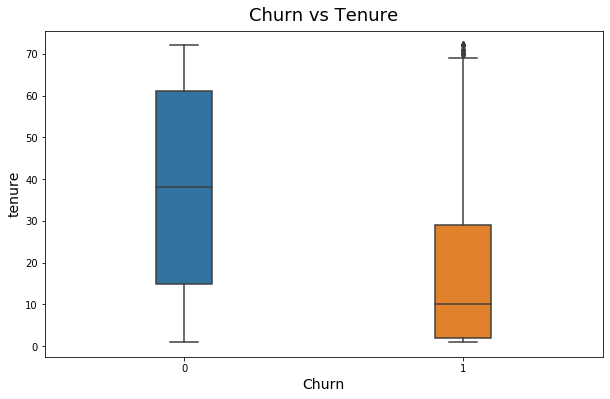

In [16]:
plt.figure(figsize = (10,6))
plt.title('Churn vs Tenure', fontsize = 18, pad=10)
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
sns.boxplot(x = 'Churn', y = 'tenure', data=df, width = 0.2)

<br>

**Tenure**
* Long term customers with a longer tenure doesn't tend to churn much.
* This observation seems to be in accordance with our inference earlier from the analysis of Total Charges.

Let's see how correlated are these features to each other.

In [17]:
df[['tenure','MonthlyCharges', 'TotalCharges' ]].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


There is obviously a high correlation between tenure and Total Charges. It would be better if we convert 'tenure' into a categorical variable.

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [19]:
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return 1
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return 2
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return 3
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return 4
    elif telcom["tenure"] > 60 :
        return 5
df["tenure_group"] = df.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,2
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1


### 3.2 Analysing Gender, Senior Citizen, Partner, Dependents, Phone Service and Paperless billing (Binary valued features)

Here we will plot the percentage of churned customers across the categories of each feature. We will also plot a count plot for the feature in consideration. If there is a marked difference in the churning rate among the categories and there is also a significant number of customers belonging to the categories with a large difference in the churning rate with respect to other categories, then we can conclude that the feature has a strong bearing on the churn rate.

In [21]:
#function to create the required plots
def analyse(feature):
    
    #temp dataframe for creating the mean-plot
    temp = df[['Churn', feature]].groupby(feature).mean()
    temp.reset_index(inplace = True)
    
    #subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
    title = 'Analysing the \'' + feature + '\' feature'
    title1 = feature + ' vs Churn'
    title2 = feature + ' - Count Plot'
    
    #setting titles and labels
    fig.suptitle(title, fontsize=22)
    ax1.set_title(title1, fontsize = 18, pad=10)
    ax1.set_xlabel('', fontsize = 16)
    ax1.set_ylabel('', fontsize = 16)
    ax2.set_title(title2, fontsize = 18, pad=10)
    ax2.set_xlabel('', fontsize = 16)
    ax2.set_ylabel('', fontsize = 16)
    
    #plotting using seaborn
    sns.barplot(x = temp.columns[0], y = temp.columns[1], data = temp, ax = ax1)
    sns.countplot(y=feature,  data=df, ax = ax2)
    
    #adjusting the bar widths and heights
    for p in ax1.patches:
        w = p.get_width()
        p.set_width(0.4)
        p.set_x(p.get_x() + (w-0.4)/2) 
    for p in ax2.patches:
        h = p.get_height()
        p.set_height(0.4)
        p.set_y(p.get_y() + (h-0.4)/2) 
    
    plt.show()

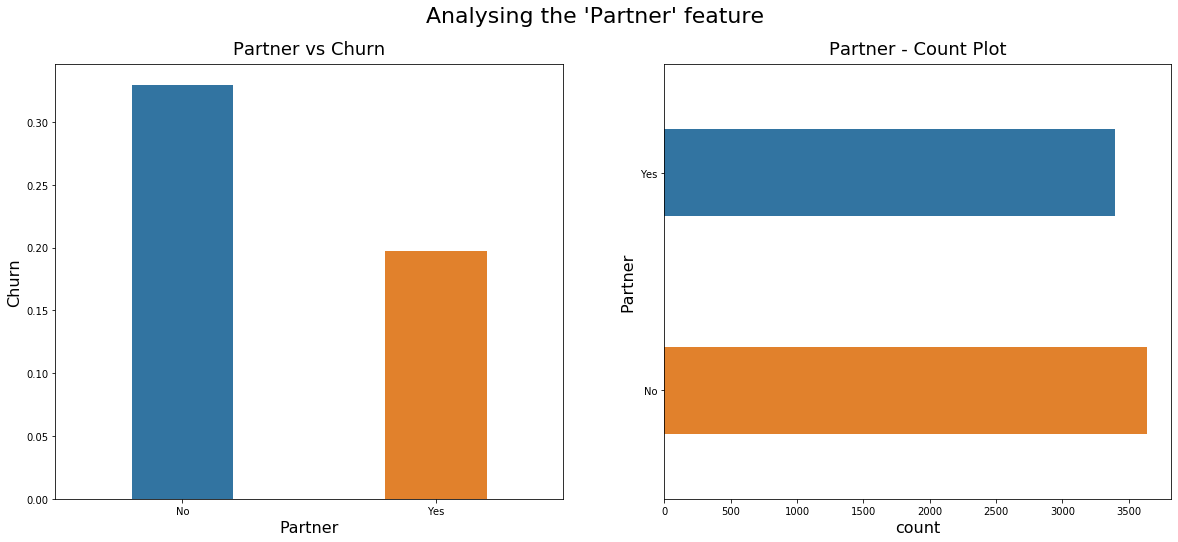

In [22]:
analyse('Partner')

<br>

**Partner**
* For customers with a partner, the churn rate is significantly low in comparison to those without a partner.
* The distribution of customers across the categories is almost uniform.
* We can conclude that Partner is a pretty relevant feature.

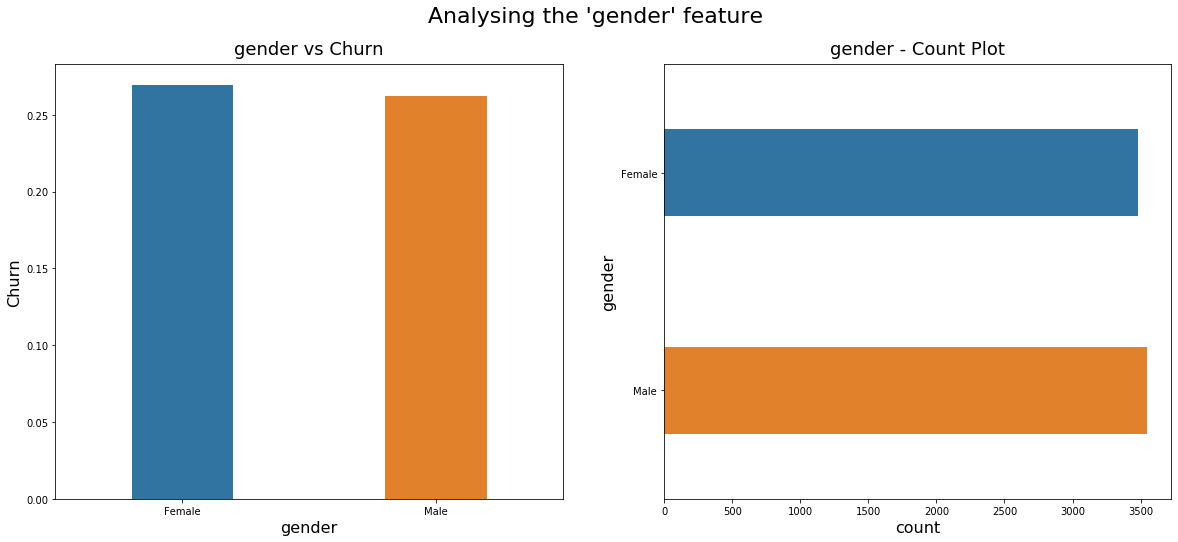

In [23]:
analyse('gender')

<br>

**Gender**
* We can see that gender has no significant effect on the churn rate.
* We can conclude that gender is a not a very relevant feature for our project.

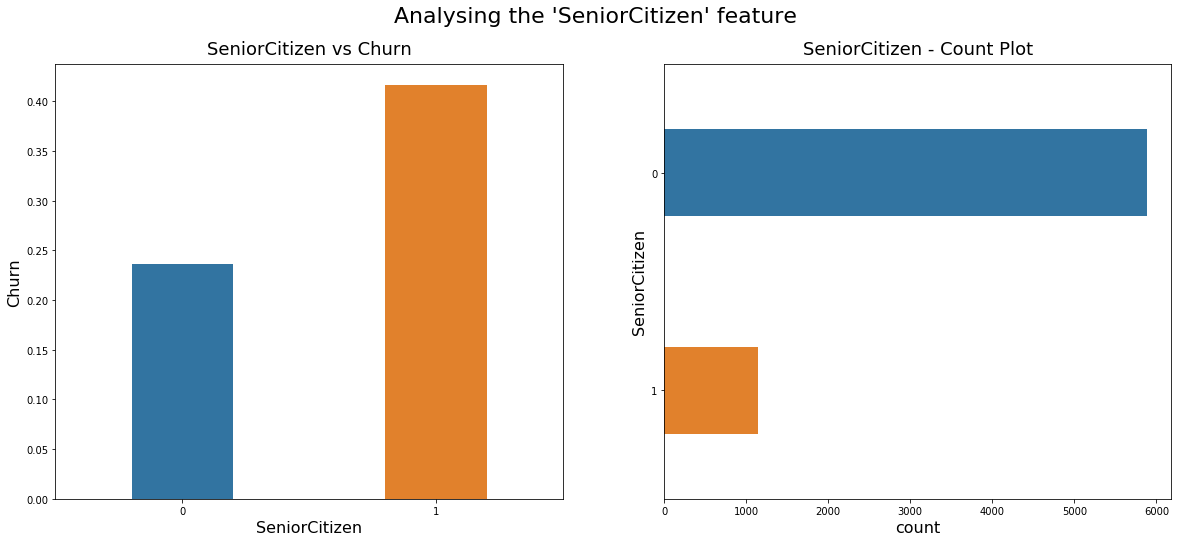

In [24]:
analyse('SeniorCitizen')

<br>

**Senior Citizen**
* Senior Citizens show a very high churn rate (more than 40%).
* Around 1/7 th of the customers are senior citizens.
* We can conclude that this feature has some relevance.

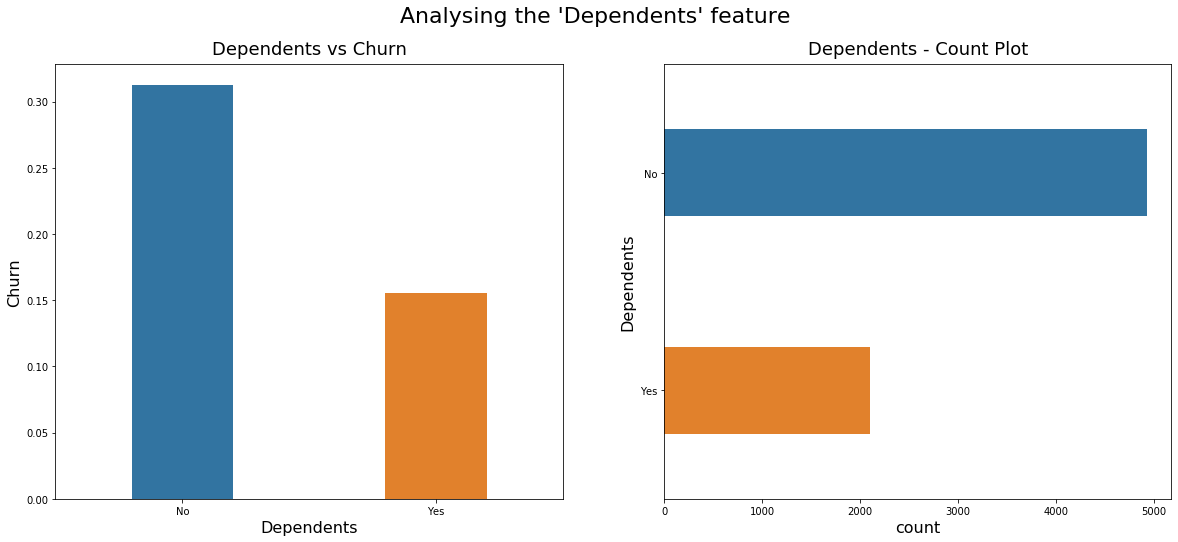

In [25]:
analyse('Dependents')

<br>

**Dependents**
* Customers with dependents tend to churn much less.
* Around 2/7 th of the customers have dependents.
* We can conclude that this is a pretty relevant feature.

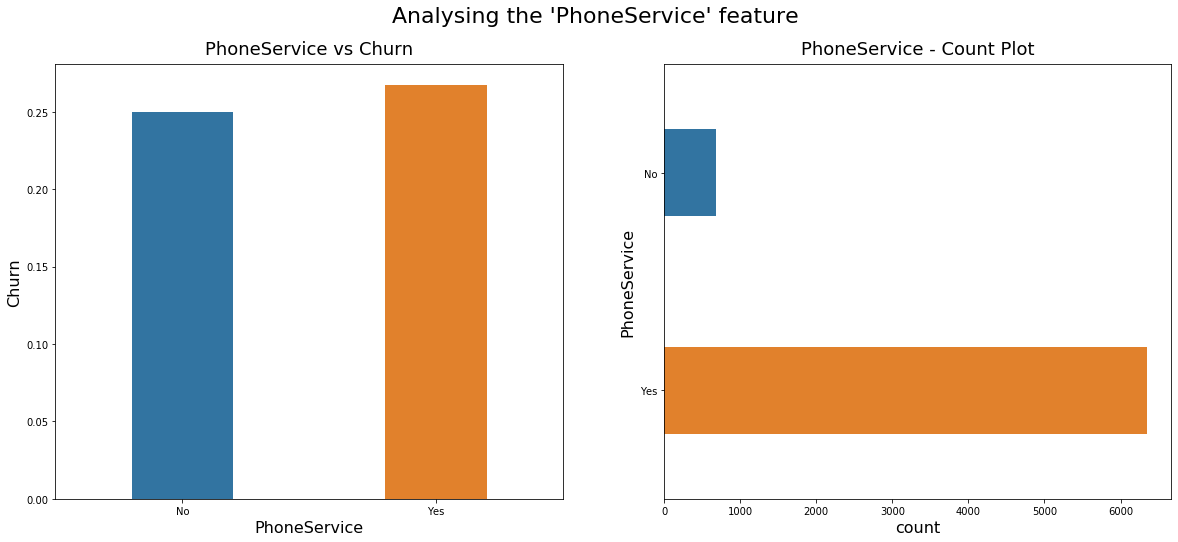

In [26]:
analyse('PhoneService')

<br>

**Phone Service**
* Phone Service has no significant effect on the churn rate.
* Moreover, most of the customers have a phone service.
* We can conclude that Phone Service is not a very relevant feature.

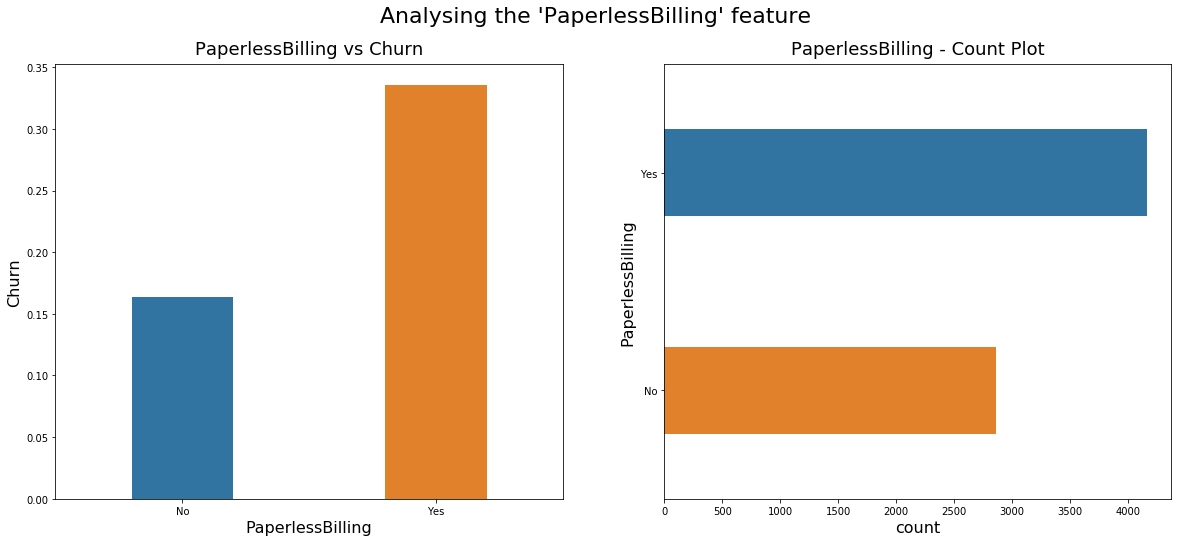

In [27]:
analyse('PaperlessBilling')

<br>

**Paperless Billing**
* Customers with paper less billing show a higher tendency to churn.
* Around 40% of the customers use paper less billing.
* We can conclude that this is a pretty relevant feature.

### 3.3 Analysing the remaining categorical features

We will do a similar analysis for features with more that 2 categories as well.

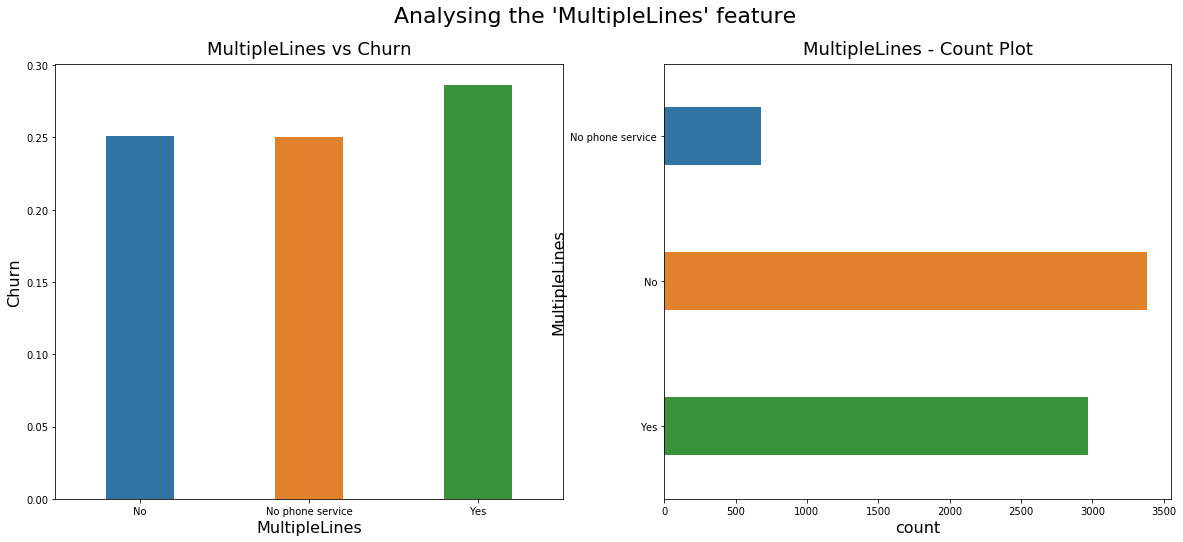

In [28]:
analyse('MultipleLines')

<br>

**Multiple Lines**
* Customers with multiple lines have a slightly higher tendency to churn.
* Customers with no phone service and a the ones with no multple lines tend to show a very similar behaviour when it comes to churn, so we can think of combining these two categories.
* We can conclude that this feature has some relevance.

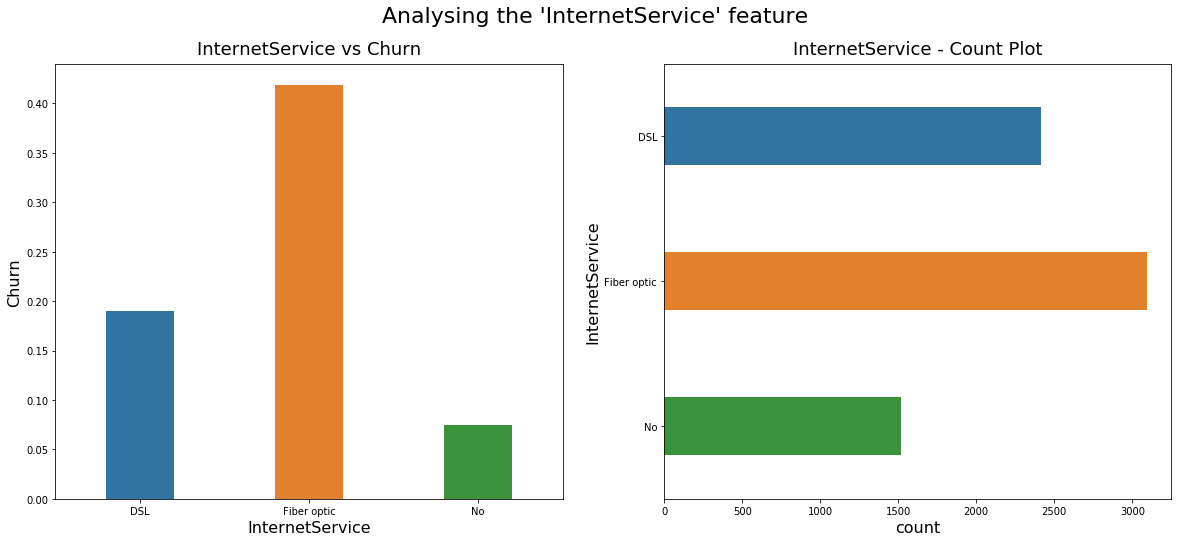

In [29]:
analyse('InternetService')

<br>

**Internet Service**
* Customers who use a fiber optic service shows a very high tendency to churn.
* In general, customers without an internet service doesn't churn much.
* There is a significant number of customers in all the three categories.
* We can conclude that this is a pretty relevant feature.

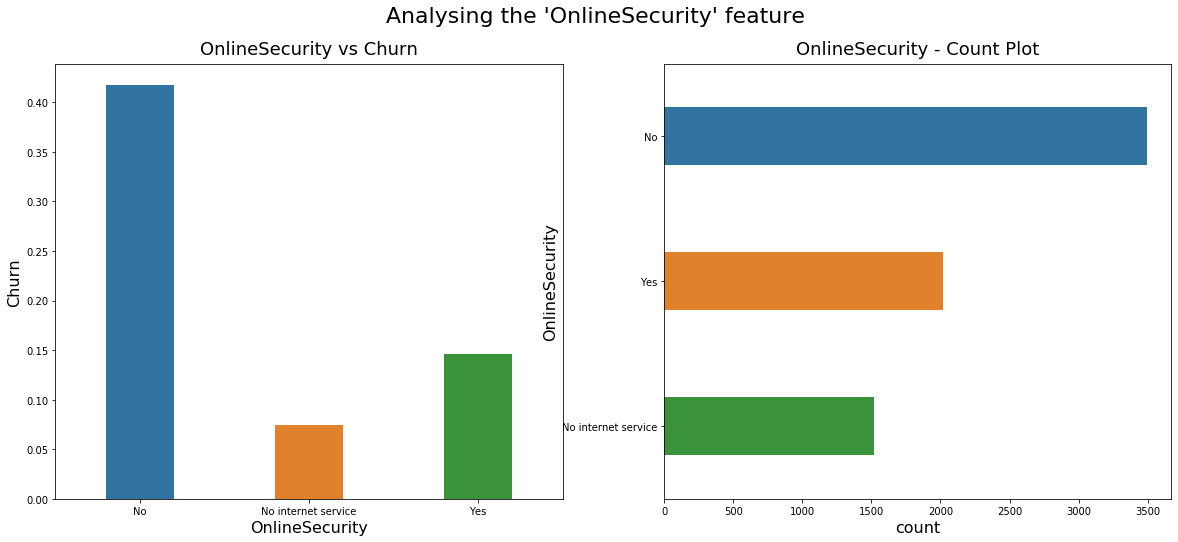

In [30]:
analyse('OnlineSecurity')

<br>

**Online Security**
* Customers who doesn't have online security shows a very high tendency to churn.
* There is a significant number of customers in all the three categories.
* We can conclude that this is a pretty relevant feature.

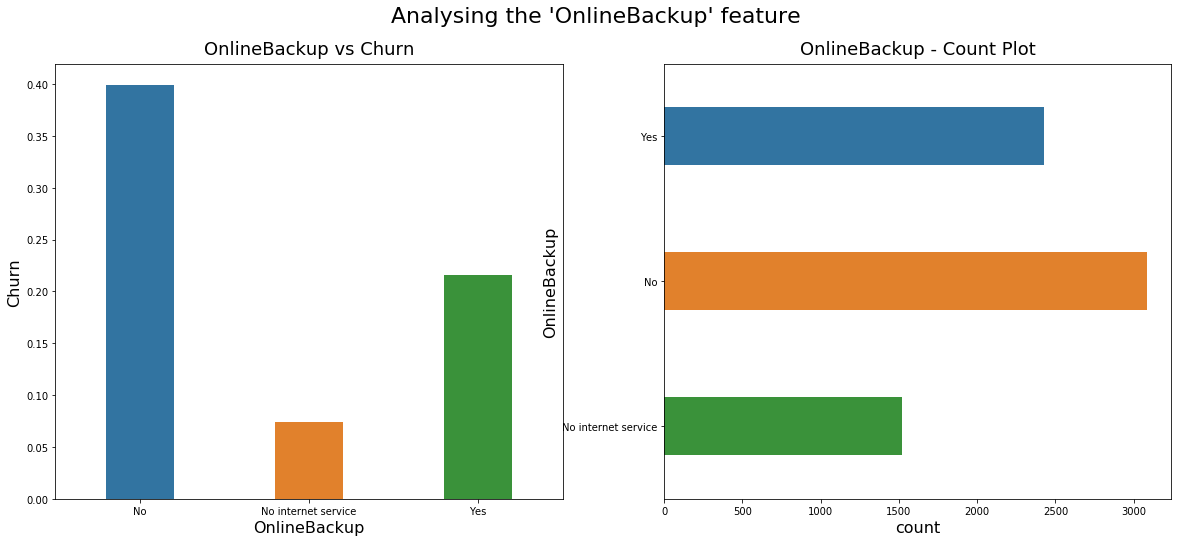

In [31]:
analyse('OnlineBackup')

<br>

**Online Backup**
* Customers who doesn't have online backup shows a very high tendency to churn.
* There is a significant number of customers in all the categories.
* We can conclude that this is a pretty relevant feature.

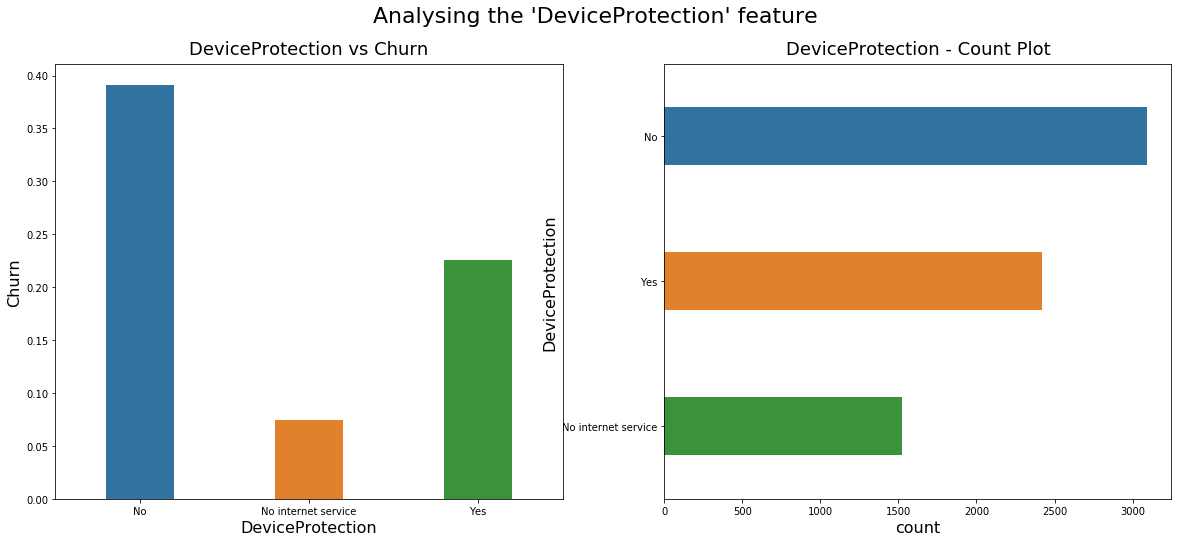

In [32]:
analyse('DeviceProtection')

<br>

**Device Protection**
* Customers who doesn't have device protection shows a very high tendency to churn.
* There is a significant number of customers in all the categories.
* We can conclude that this is a pretty relevant feature.

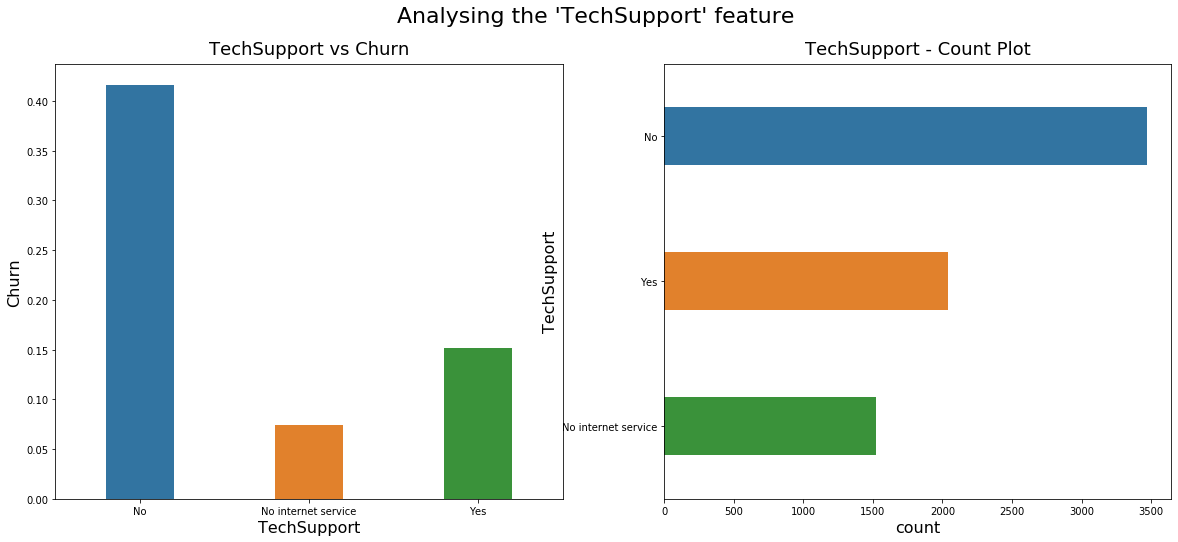

In [33]:
analyse('TechSupport')

<br>

**Tech Support**
* Customers who doesn't have tech support shows a very high tendency to churn.
* There is a significant number of customers in all the categories.
* We can conclude that this is a pretty relevant feature.

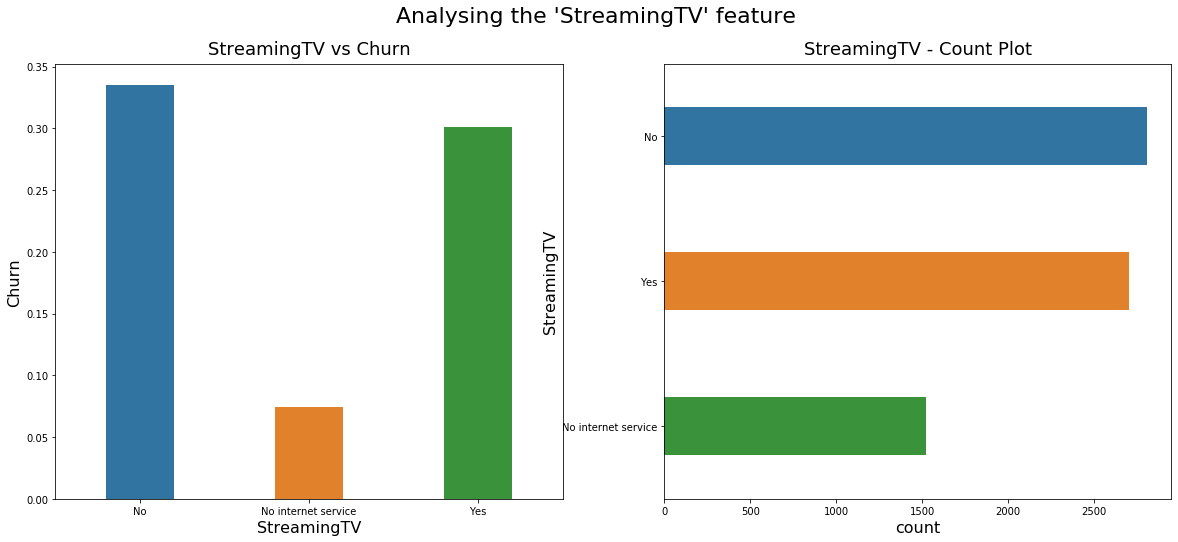

In [34]:
analyse('StreamingTV')

<br>

**Streaming TV**
* Availing TV Streaming service doesn't have much of a bearing towards the churn rate.
* We can conclude that this feature has a comparatively low relevance when compared to other add-on services provided along with internet.

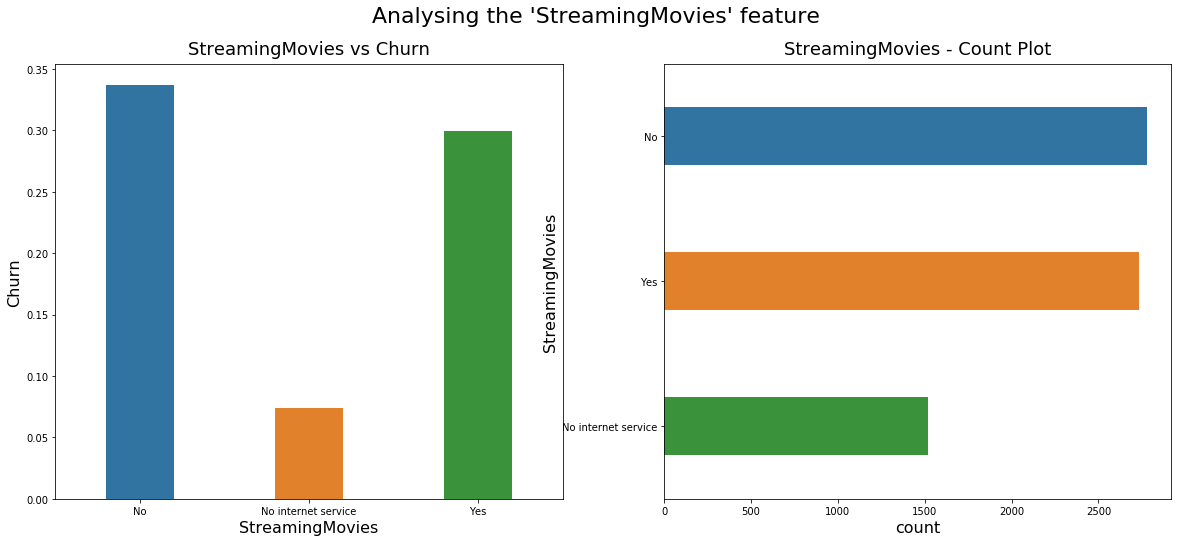

In [35]:
analyse('StreamingMovies')

<br>

**Streaming Movies**
* Availing movie streaming service doesn't have much of a bearing towards the churn rate.
* We can conclude that this feature has a comparatively low relevance when compared to other add-on services provided along with internet.

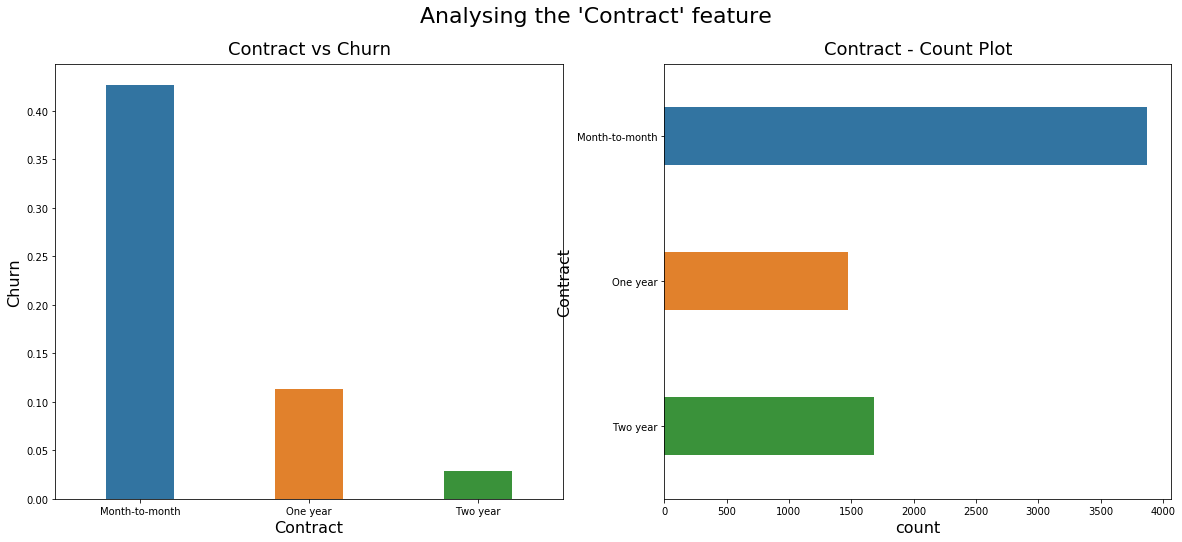

In [36]:
analyse('Contract')

<br>

**Contract**
* Customers with long term contracts show a lower tendency to churn.
* Although most of the customers go for a month-to-month type of contract, there is a significant number of customers choosing the other two options as well.
* We can conclude that this is a pretty relevant feature.

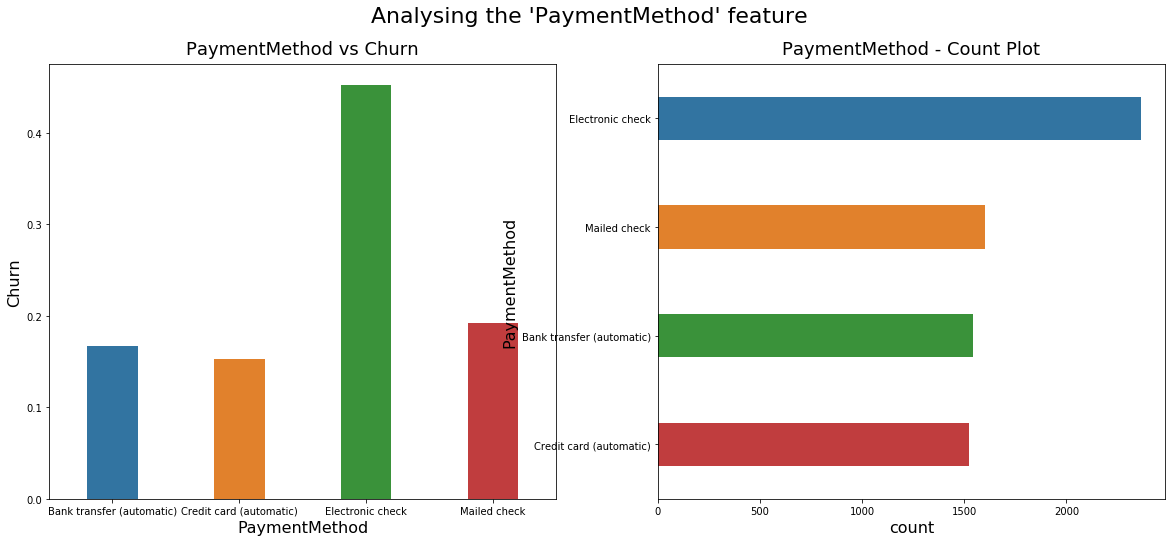

In [37]:
analyse('PaymentMethod')

<br>

**Payment Method**
* Customers pating through electronic checks show a higher tendency to churn.
* Churn rate among other customers with other mode of payments is pretty much the same.
* We can conclude that this is a pretty relevant feature.

### 3.4 Inferences from the EDA

From our analysis, we can categorise the features into three categories based on their relevance.

**High Relevance**
1. Monthly Charges
2. Total Charges
3. Tenure
4. Partner
5. Dependents
6. Paperless Billing
7. Internet Service
8. Online Security
9. Online Backup
10. Device Protection
11. Tech Support
12. Contract
13. Payment Method

**Medium Relevance**
1. Senior Citizen
2. Multiple Lines
3. Streaming TV
4. Streaming Movies

**Low Relevance**
1. Gender
2. Phone Service

We will try out different strategies on how to choose our set of features which will be explained in the modelling section.

#### Ideas for feature engineering

* We see that customers who have not subscribed to add on online services like Online Security, Online Backup, Device Protection and Tech Support tend to show a higher tendency to churn. We will create a new features based on whether the customer has not subscribed to either none of these services (after choosing to use Internet service).
* We will also create a similar new feature combining the Streaming TV and Streaming Movies features.
* In the Payment Method feature, the automatic mode of payments can be combined.

## 4. Feature Engineering and Data Manipulation

In [38]:
def addon(row, num, columns):
    count = 0
    if row['InternetService'] == 'No':
        return 0
    for column in columns:
        if row[column] == 'No':
            count += 1
    if count == num:
        return 1
    else:
        return 0

In [39]:
df['No_addon'] = df.apply(lambda row: addon(row, 4, ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']), axis=1)
df['No_streaming'] = df.apply(lambda row: addon(row, 2, ['StreamingTV', 'StreamingMovies']), axis=1)

Now let's analyse the newly created features.

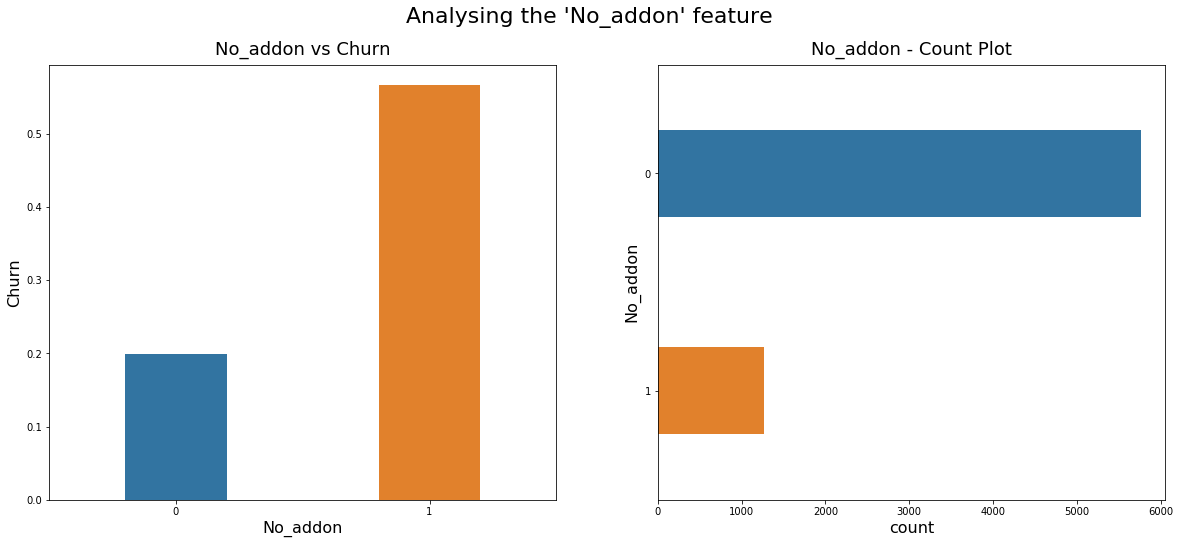

In [40]:
analyse('No_addon')

The new feature based on addons seem to be pretty relevant. Although tree based methods would be able to understand this feature by itself through multiple splits, using this feature explicitly can make things much simpler even there. Let's keep this additional feature along with the other features which it is based on.

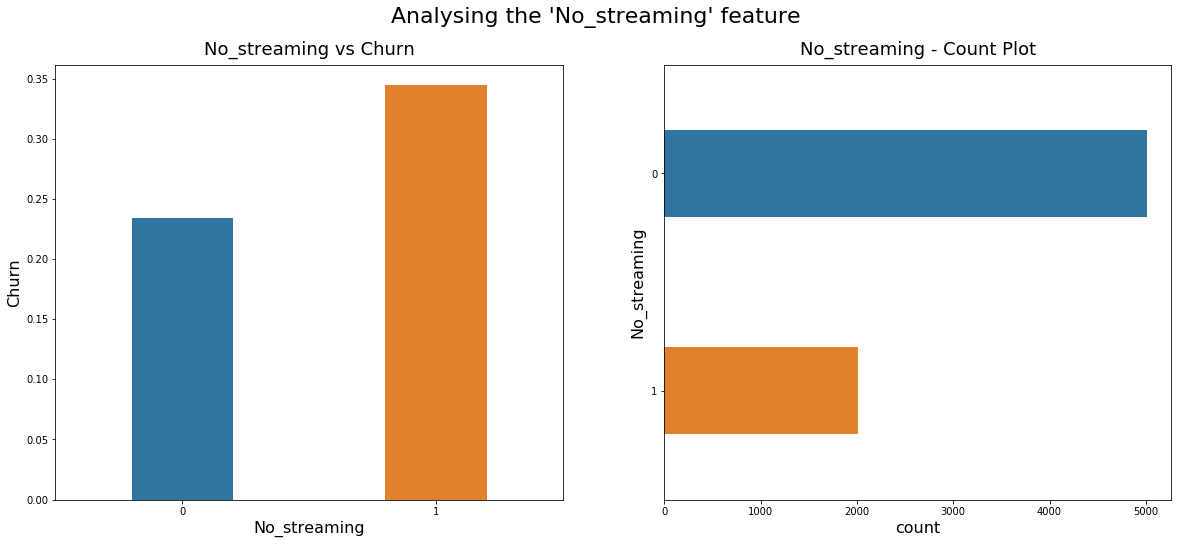

In [41]:
analyse('No_streaming')

This feature also seems very relevant in comparison to its parent features. We will use this feature and drop its parent features.

#### Feature Selection and Encoding

We will drop the features with low relevance and also combine 'StreamingTV' and 'StreamingMovies' into the new feature 'No_streaming'. We will also drop the tenure feature which we had binned earlier. We will labelise the binary valued features to 0 and 1 in place of 'No' and 'Yes'. We will use one-hot encoder for the other features.

In [42]:
df.drop(columns = {'StreamingTV', 'StreamingMovies', 'gender', 'PhoneService'}, inplace = True)

In [43]:
df.drop(columns = 'tenure', inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,No_addon,No_streaming
0,0,Yes,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,1
1,0,No,No,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,0,3,0,1
2,0,No,No,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,0,1
3,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,1
4,0,No,No,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,1,1


In [44]:
columns = ['Partner', 'Dependents', 'PaperlessBilling']

for column in columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
    
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,No_addon,No_streaming
0,0,1,0,No phone service,DSL,No,Yes,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1
1,0,0,0,No,DSL,Yes,No,Yes,No,One year,0,Mailed check,56.95,1889.50,0,3,0,1
2,0,0,0,No,DSL,Yes,Yes,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,0,1
4,0,0,0,No,Fiber optic,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1,1,1


In [45]:
#one-hot encoding
X = df.drop(columns = 'Churn', axis = 1)
y = df['Churn']
X = pd.get_dummies(X)
X.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,tenure_group,No_addon,No_streaming,MultipleLines_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,29.85,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,56.95,1889.50,3,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,53.85,108.15,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,42.30,1840.75,3,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,1,70.70,151.65,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0


## 5. Modelling

Here we have an imbalanced dataset which needs to be taken care of. Two ways to overcome this problem is to use undersampling or oversampling. What we will do here is to try 3 approaches and see which one would work better. 

1. Proceed with the original dataset
2. Use undersampling
3. Use oversampling

Here we will use a 80-10-10 split for the test, train and dev sets. In the undersampling and oversampling techniques, it is important that our dev set and test set comes from the same distribution, and hence we cannot use a cross validation approach on the train set. So instead of using GridSearch, we will have an explicit dev set on which our hyperparameters will be tuned. Although for the original dataset, this is not necessary, we will take a similar apporach to ensure uniformity.

We will use accuracy as our optimizing metric. Please note that in this case any score below 0.74 is worse than predicting that none of the customers will churn.

In [46]:
#train-test-dev (80-10-10) sets split 
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
X_train, X_dev, y_train, y_dev = train_test_split(X_1, y_1, test_size=1/9, random_state=3)
print(X_train.shape,X_dev.shape,X_test.shape,y_train.shape,y_dev.shape,y_test.shape)

(5624, 34) (704, 34) (704, 34) (5624,) (704,) (704,)


In [47]:
#disabling printing of status update from parallel processing (for ease of use)
import tqdm
class _TQDM(tqdm.tqdm):
    def __init__(self, *argv, **kwargs):
        kwargs['disable'] = True
        if kwargs.get('disable_override', 'def') != 'def':
            kwargs['disable'] = kwargs['disable_override']
        super().__init__(*argv, **kwargs)
tqdm.tqdm = _TQDM

In [48]:
#function for tuning hyperparameters and then evaluating different models using its tuned hyperparameters
from hypopt import GridSearch

def best_model(X_train, y_train, X_dev, y_dev, X_test, y_test, models, params, scorer = 'f1'):
    train_score = {}
    dev_score = {}
    test_score = {}
    
    for name in models.keys():
        
        if (name[:3] == 'XGB'):
            gs = GridSearch(model = models[name], param_grid = params[name], parallelize = False)
        else:
            gs = GridSearch(model = models[name], param_grid = params[name], parallelize = True)
        
        gs.fit(X_train, y_train, X_dev, y_dev, scoring = scorer);

        train_score[name] = gs.score(X_train, y_train)
        dev_score[name] = gs.score(X_dev, y_dev)
        test_score[name] = gs.score(X_test, y_test)
        
        print(f'{name} - Completed')
        
    print(f'All models completed!')
    
    results = {}
    results['train'] = train_score
    results['dev'] = dev_score
    results['test'] = test_score
    
    return results

In [49]:
#function for plotting the performance on test, train and dev sets

import matplotlib.pyplot as plt

def plot(scores):
    
    plt.figure(figsize=(15,8))
   
    for label in ('train','dev','test'):
        x = [key for key in scores[label].keys()]
        y = [scores[label][key] for key in scores[label].keys()]
        plt.plot(x, y, marker='o', markersize=8, label = label)
    
    plt.title('Performance of different algorithms', fontdict={'fontsize':20}, pad=10)
    plt.xlabel('Model', fontdict={'fontsize':16})
    plt.ylabel('F1 score', fontdict={'fontsize':16})
    
    plt.legend()
    plt.show()

## 5.1 Original Dataset

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_o = scaler.fit_transform(X_train)
X_dev_o = scaler.transform(X_dev)
X_test_o = scaler.transform(X_test)

In [51]:
#setting up the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

models = {'Logistic Regression': LogisticRegression(max_iter = 1000), 'SVM': SVC(),
         'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier(), 
          'Random Forest': RandomForestClassifier(), 'GBM': GradientBoostingClassifier(),
          'XGB Classifier': xgb.XGBClassifier(), 'XGB Random Forest': xgb.XGBRFClassifier()
         }

params = {}
params['Logistic Regression'] = [{'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}] 
params['SVM'] =  [{'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': ['scale', 'auto']}]
params['KNN'] =  [{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']}]
params['Decision Tree'] = [{'max_depth': [3, 5, 8, 10, 15, None], 'max_features': ['auto', 'log2',None]}]
params['Random Forest'] =  [{'n_estimators': [10, 30, 100, 300, 500, 1000]}]
params['GBM'] =  [{'learning_rate':[0.01, 0.03, 0.1, 0.3] , 'n_estimators': [30, 100, 300, 500, 1000], 'max_depth': [3,5,8,10] }]
params['XGB Classifier'] = [{'max_depth':[3, 5, 8, 10], 'learning_rate':[0.05,0.1,0.2,0.3]}]
params['XGB Random Forest'] = [{'max_depth':[3, 5, 8, 10], 'n_estimators':[10,100,300,1000], 'learning_rate':[0.05,0.1,0.2,0.3]}]

Logistic Regression - Completed
SVM - Completed
KNN - Completed
Decision Tree - Completed
Random Forest - Completed
GBM - Completed
XGB Classifier - Completed
XGB Random Forest - Completed
All models completed!


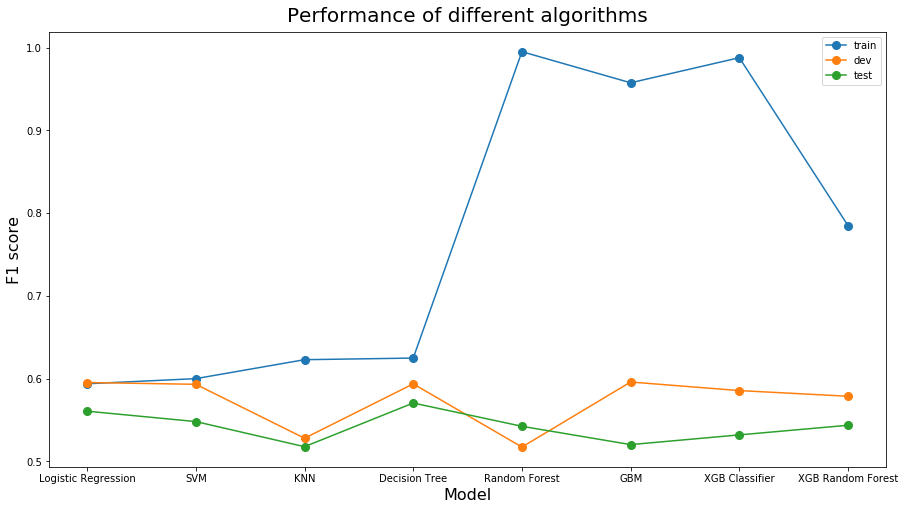

In [52]:
original = {}

original = best_model(X_train_o, y_train, X_dev_o, y_dev, X_test_o, y_test, models, params, scorer = 'f1')

plot(original)

## 5.2 Undersampling

In [61]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_tunder, y_tunder = rus.fit_resample(X_train, y_train)
X_tunder.shape

(3018, 34)

In [54]:
scaler_1 = StandardScaler()
X_train_under = scaler_1.fit_transform(X_tunder)
X_dev_under = scaler_1.transform(X_dev)
X_test_under = scaler_1.transform(X_test)

Logistic Regression - Completed
SVM - Completed
KNN - Completed
Decision Tree - Completed
Random Forest - Completed
GBM - Completed
XGB Classifier - Completed
XGB Random Forest - Completed
All models completed!


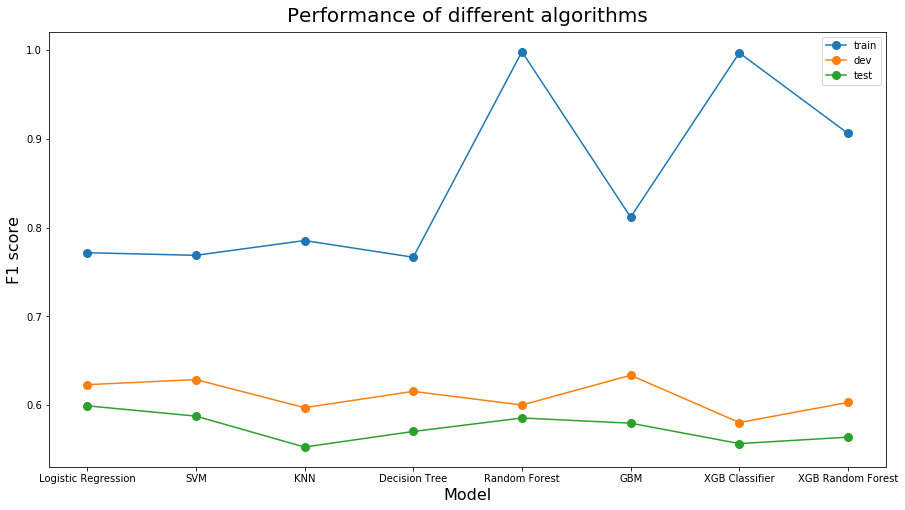

In [55]:
under = {}

under = best_model(X_train_under, y_tunder, X_dev_under, y_dev, X_test_under, y_test, models, params, scorer = 'f1')

plot(under)

## 5.3 Oversampling using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=3)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_res.shape)

(5624, 34)
(8230, 34)


In [57]:
scaler_2 = StandardScaler()

X_train_over = scaler_2.fit_transform(X_res)
X_dev_over = scaler_2.transform(X_dev)
X_test_over = scaler_2.transform(X_test)

Logistic Regression - Completed
SVM - Completed
KNN - Completed
Decision Tree - Completed
Random Forest - Completed
GBM - Completed
XGB Classifier - Completed
XGB Random Forest - Completed
All models completed!


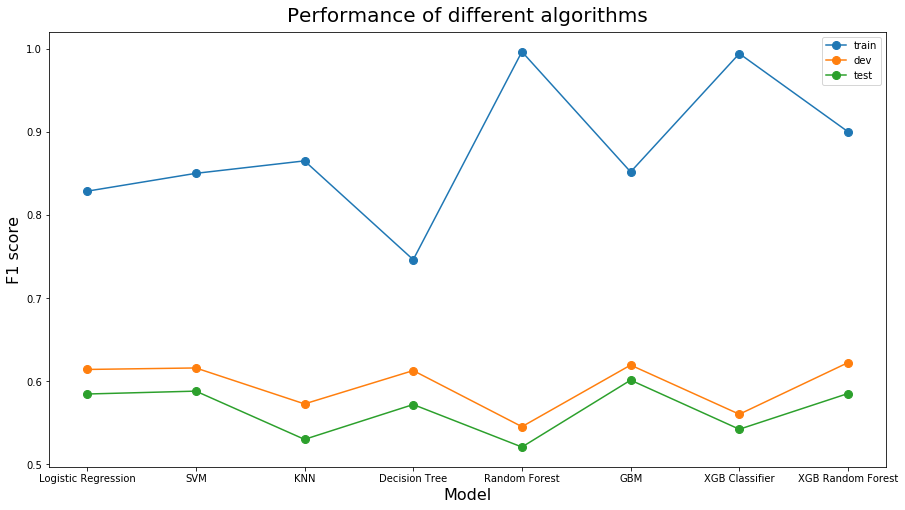

In [58]:
over = {}

over = best_model(X_train_over, y_res, X_dev_over, y_dev, X_test_over, y_test, models, params)

plot(over)

## 6. Comparing the Results

In [59]:
def compare(split = 'test'):
    
    plt.figure(figsize=(15,8))
   
    labels = ['original','under','over']
    i = 0
    
    for scores in (original,under,over):
        x = [key for key in scores[split].keys()]
        y = [scores[split][key] for key in scores[split].keys()]
        plt.plot(x, y, marker='o', markersize=8, label = labels[i])
        i += 1
    
    plt.title(f'Performance of different sampling techniques on the {split} set', fontdict={'fontsize':20}, pad=10)
    plt.xlabel('Model', fontdict={'fontsize':16})
    plt.ylabel('F1 score', fontdict={'fontsize':16})
    
    plt.legend()
    plt.show()

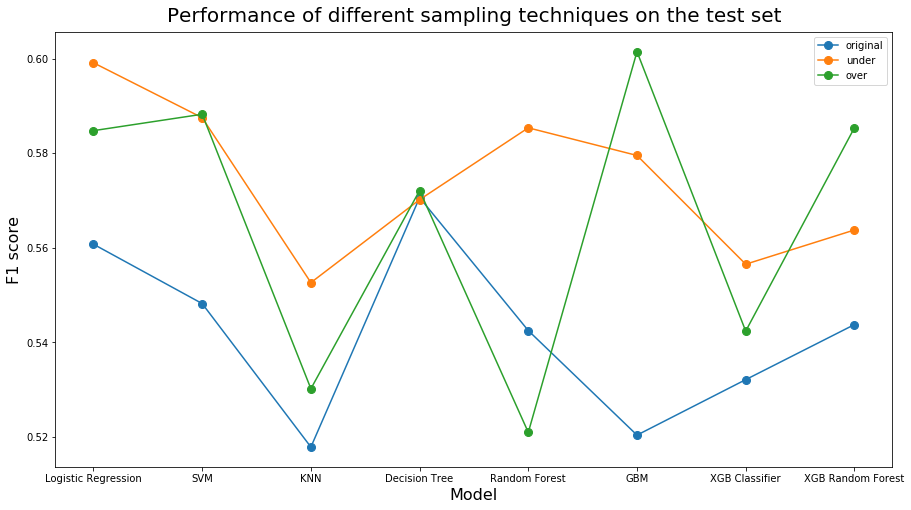

In [60]:
compare('test')